In [20]:
import numpy as np
np.random.seed(0)
from sklearn import preprocessing
import statsmodels.api as sm
import pandas as pd
#!pip install plot_metric
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('datasets/x123y.csv', index_col=None)
df.head()

,y,x1,x2,x3
0,Y,155.790056,4.933690,2
1,Y,178.684612,4.954482,2
2,N,84.800629,5.466779,2
3,N,134.143849,5.714651,1
4,N,151.508991,5.750980,1


In [22]:
# encode the dataset
labenc = preprocessing.LabelEncoder()
df[['y']] = df[['y']].apply(labenc.fit_transform)
df.head()

,y,x1,x2,x3
0,1,155.790056,4.933690,2
1,1,178.684612,4.954482,2
2,0,84.800629,5.466779,2
3,0,134.143849,5.714651,1
4,0,151.508991,5.750980,1


In [23]:
# X is a dataframe, Y is a numpy array
X = df[['x1','x2','x3']]
X = sm.add_constant(X)
y = df.y

In [24]:
X

,const,x1,x2,x3
0,1.0,155.790056,4.933690,2
1,1.0,178.684612,4.954482,2
2,1.0,84.800629,5.466779,2
3,1.0,134.143849,5.714651,1
4,1.0,151.508991,5.750980,1
5,1.0,144.062300,5.930181,2
6,1.0,133.540458,5.956771,1
7,1.0,159.768477,5.991977,1
8,1.0,178.297902,6.183273,2
9,1.0,132.660237,6.342022,1


In [25]:
y

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    1
18    1
19    0
20    0
21    1
22    0
23    1
24    0
25    0
26    0
27    1
28    1
29    1
30    0
31    0
32    0
33    0
34    1
35    0
Name: y, dtype: int32

In [26]:
# there are many parameters to tune in this
model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.313418
         Iterations 8


In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Feb 2022   Pseudo R-squ.:                  0.5310
Time:                        09:49:58   Log-Likelihood:                -11.283
converged:                       True   LL-Null:                       -24.057
Covariance Type:            nonrobust   LLR p-value:                 1.186e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.0875      7.442     -2.431      0.015     -32.673      -3.502
x1             0.1118      0.045      2.488      0.013       0.024       0.200
x2            -0.4805      0.361     -1.332      0.183      -1.188       0.227
x3             3.5709      1.623      2.200      0.028       0.390       6.751
==============================================================================
"""

In [13]:
model.predict(X)

0     0.983754
1     0.998712
2     0.016457
3     0.094237
4     0.416122
5     0.909979
6     0.079675
7     0.615156
8     0.997576
9     0.061208
10    0.087520
11    0.088849
12    0.002146
13    0.000288
14    0.886369
15    0.055386
16    0.001621
17    0.695262
18    0.914379
19    0.000325
20    0.112316
21    0.999421
22    0.021721
23    0.426879
24    0.300615
25    0.316194
26    0.042240
27    0.559557
28    0.999474
29    0.571091
30    0.000071
31    0.671955
32    0.363517
33    0.333340
34    0.376491
35    0.000096
dtype: float64

In [14]:
df['prob'] = model.predict(X)
df.head()

,y,x1,x2,x3,prob
0,1,155.790056,4.933690,2,0.983754
1,1,178.684612,4.954482,2,0.998712
2,0,84.800629,5.466779,2,0.016457
3,0,134.143849,5.714651,1,0.094237
4,0,151.508991,5.750980,1,0.416122


In [15]:
df[df.prob < 0.5]

,y,x1,x2,x3,prob
2,0,84.800629,5.466779,2,0.016457
3,0,134.143849,5.714651,1,0.094237
4,0,151.508991,5.750980,1,0.416122
6,0,133.540458,5.956771,1,0.079675
9,1,132.660237,6.342022,1,0.061208
10,0,104.617849,6.444499,2,0.087520
11,0,136.788319,6.464930,1,0.088849
12,0,103.063883,6.554604,1,0.002146
13,0,85.569774,6.670968,1,0.000288
15,0,134.647862,7.025490,1,0.055386


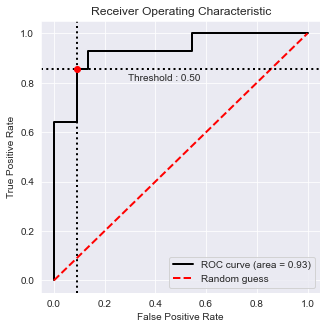

In [16]:
# Visualisation with plot_metric
bc = BinaryClassification(y, model.predict(X), labels=["0", "1"])
# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()